MLPClassifier example 

In [1]:
import numpy as np 
import pandas as pd 



In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

## Load in the file Dataset_spine.csv

- Use Pandas
- Drop the column Unnamed: 13

Always inspect the dataframe using .head()

In [3]:
# your code here

# Load the dataset
spine_data = pd.read_csv('Dataset_spine.csv', skipinitialspace=True)

# Display the first few rows
print("Dataset shape:", spine_data.shape)

# Drop column 13
spine_data.drop(columns=['Unnamed: 13'], inplace=True)

spine_data.head()

Dataset shape: (310, 14)


,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal



Missing values per column:
Col1         0
Col2         0
Col3         0
Col4         0
Col5         0
Col6         0
Col7         0
Col8         0
Col9         0
Col10        0
Col11        0
Col12        0
Class_att    0
dtype: int64

Dataset statistics:
             Col1        Col2        Col3        Col4        Col5        Col6  \
count  310.000000  310.000000  310.000000  310.000000  310.000000  310.000000   
mean    60.496653   17.542822   51.930930   42.953831  117.920655   26.296694   
std     17.236520   10.008330   18.554064   13.423102   13.317377   37.559027   
min     26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179   
25%     46.430294   10.667069   37.000000   33.347122  110.709196    1.603727   
50%     58.691038   16.357689   49.562398   42.404912  118.268178   11.767934   
75%     72.877696   22.120395   63.000000   52.695888  125.467674   41.287352   
max    129.834041   49.431864  125.742385  121.429566  163.071041  418.543082   

             

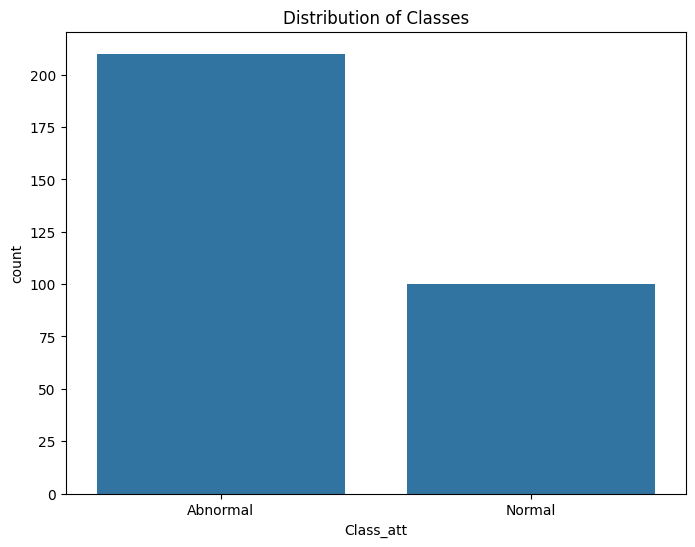

In [4]:
# Check for missing values
print("\nMissing values per column:")
print(spine_data.isnull().sum())

# Dataset statistics
print("\nDataset statistics:")
print(spine_data.describe())

# Check the target classes
print("\nTarget classes:")
print(spine_data["Class_att"].value_counts())

# Visualize the distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Class_att', data=spine_data)
plt.title('Distribution of Classes')
plt.show()

Also drop ['Col7','Col8','Col9','Col10','Col11','Col12']

In [5]:
# your code here

# Drop col 7 - 12 but not don't drop the "Class_att" column
#spine_data.drop(columns=spine_data.columns[7:13], inplace=True)
#spine_data.head()

This will show the classes, obviously that column will be our y, the rest will be X

In [6]:
spine_data["Class_att"].unique()

array(['Abnormal', 'Normal'], dtype=object)

Binary Classifier

import the things we need from sklearn.neural_network import MLPClassifier

train_test_split
confusion_matrix

In [7]:
# your code here 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Set the variables X and y by picking the columns as discussed above

Do a train_test_split, use a fixed random_state and make the test_size be 25%

In [8]:
X = spine_data.iloc[:, :-1]
y = spine_data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now lets use MLPClassifier from sklearn

Do for 3 hidden layers with 100 units in each

set tol=0.000000001

use solver 'sgd'

In [9]:
from sklearn.neural_network import MLPClassifier
MLPClassifier?

# Use a Multi-layer Perceptron classifier for 3 hidden layers with 100 units each, set tol to 0.set tol=0.000000001 and use solver 'sgd'
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000, tol=0.000000001, solver='sgd', random_state=42)

# Fit the model
mlp.fit(X_train_scaled, y_train)

# Predict the test set
y_pred = mlp.predict(X_test_scaled)

# Analyze the results
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[51  6]
 [ 7 14]]
              precision    recall  f1-score   support

    Abnormal       0.88      0.89      0.89        57
      Normal       0.70      0.67      0.68        21

    accuracy                           0.83        78
   macro avg       0.79      0.78      0.78        78
weighted avg       0.83      0.83      0.83        78



/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Init signature:
MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    *,
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000,
)
Docstring:     
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden laye

fit the classifier using training

Get y_pred using .predict

Get the accuracy score

In [10]:
# Get accuracy score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 83.33%


Get the Confusion Matrix

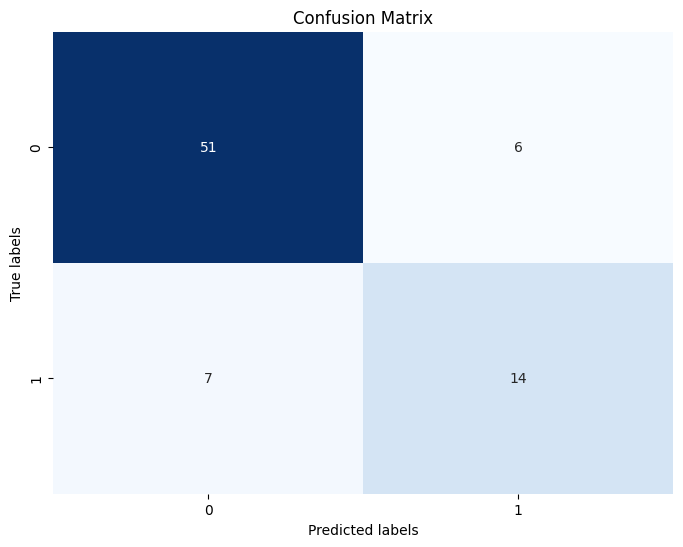

In [11]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Let's view a heatmap with the confusion matrix

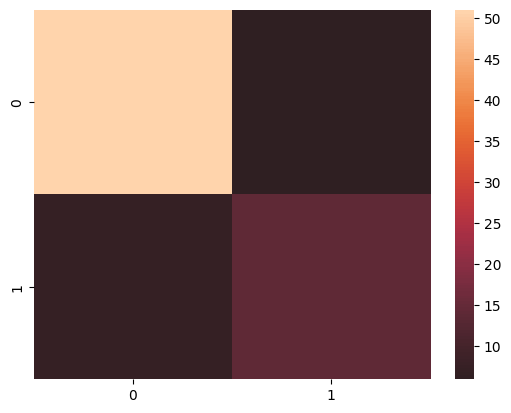

In [12]:
sns.heatmap(cm, center=True)
plt.show()

# Tensorflow

Now what about Tensorflow??

In [13]:
import tensorflow as tf
print(tf.__version__)

tf.test.gpu_device_name()

2025-03-24 15:01:48.347474: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-24 15:01:48.371137: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-24 15:01:48.631300: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-24 15:01:48.781466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742828509.103415   29885 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742828509.19

2.19.0


2025-03-24 15:01:53.390625: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


''

Set up a new sequential model, call it model_tf

Have 3 hidden layers, each with activation relu

have an output layer with only 1 unit, no activation function

Should you also set up a normaliser as well. See example workbooks

In [14]:

model_tf = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

Compile the model, pick an optimizer, use Adam or tf.keras.optimizers.experimental.SGD(0.001). loss is binarycrossentropy

    metrics=['accuracy']

In [15]:

model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
y_train

140    Abnormal
208    Abnormal
278      Normal
203    Abnormal
144    Abnormal
         ...   
188    Abnormal
71     Abnormal
106    Abnormal
270      Normal
102    Abnormal
Name: Class_att, Length: 232, dtype: object

Now try fitting, 20 epochs, do 

    X_train.values, y_train.values, epochs=20, validation_split=0.2

In [17]:

# Fit the model with 20 epochs
history = model_tf.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_test_scaled, y_test))


ValueError: Invalid dtype: object

 You should get a bunch of errors

### Why this error?

Well look at y_train

In [18]:
y_train

140    Abnormal
208    Abnormal
278      Normal
203    Abnormal
144    Abnormal
         ...   
188    Abnormal
71     Abnormal
106    Abnormal
270      Normal
102    Abnormal
Name: Class_att, Length: 232, dtype: object

They're not numbers, we need to convert those to numbers. Using LabelEncoder

Scikit-learn didn't care, but Tensorflow is a "lower-level" programming tool so you need to do the conversion yourself

In [19]:
from sklearn import preprocessing

In [20]:
# your code here


# Convert to numbers using LabelEncoder
le = preprocessing.LabelEncoder()

Fit the label encoder on y_train

In [21]:

# Fit the encoder on the target classes
le.fit(y_train)

LabelEncoder()

Now transform both y_train and y_test

In [22]:
y_train_enc = le.fit_transform(y_train)
y_test_enc = y_test_enc = le.transform(y_test)

In [23]:
y_train_enc

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

## Fitting again

Try fitting your model again with y_train_enc. It should work now

In [24]:
# your code here

# Fit the model with 20 epochs
history = model_tf.fit(X_train_scaled, y_train_enc, epochs=20, validation_data=(X_test_scaled, y_test_enc))

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6632 - loss: 1.0884 - val_accuracy: 0.7949 - val_loss: 0.4623
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7820 - loss: 0.5106 - val_accuracy: 0.8205 - val_loss: 0.3961
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8541 - loss: 0.3857 - val_accuracy: 0.8462 - val_loss: 0.3760
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8557 - loss: 0.5106 - val_accuracy: 0.8462 - val_loss: 0.5443
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8730 - loss: 0.4767 - val_accuracy: 0.8333 - val_loss: 0.5274
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9074 - loss: 0.2686 - val_accuracy: 0.8205 - val_loss: 0.6839
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9181 - loss: 0.2957 - val_accuracy: 0.8462 - val_loss: 0.6949
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9393 - loss: 0.4132 - val_accuracy: 0.8205 - val_loss: 0.8766
Epoch

Accuracy for both the training and validation sets is a little all over the place. Maybe we need more Epochs or some other way to decide when to finish. Anyway...

In [25]:
y_pred = model_tf.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [26]:
np.set_printoptions(suppress=True)

In [27]:
y_pred

array([[   9.713096  ],
       [   4.6514783 ],
       [  -3.6894684 ],
       [ -58.796368  ],
       [ -13.113508  ],
       [ -28.51698   ],
       [ -66.772354  ],
       [ -35.81682   ],
       [ -18.211226  ],
       [ -17.504757  ],
       [-137.09096   ],
       [ -86.49535   ],
       [   3.0172496 ],
       [  -2.2275639 ],
       [   0.794561  ],
       [   2.517322  ],
       [  -6.716208  ],
       [ -33.82141   ],
       [ -23.24468   ],
       [ -59.433163  ],
       [ -36.768215  ],
       [ -92.475174  ],
       [ -55.57617   ],
       [ -81.034836  ],
       [-104.66911   ],
       [ -16.290565  ],
       [ -48.188366  ],
       [  -1.72866   ],
       [  -3.0285707 ],
       [  14.989953  ],
       [ -31.97293   ],
       [ -16.892181  ],
       [ -57.328037  ],
       [   7.967672  ],
       [ -43.48882   ],
       [ -34.196625  ],
       [  -7.6747036 ],
       [   4.58311   ],
       [-107.135635  ],
       [ -31.536097  ],
       [  -9.125707  ],
       [  -6.964

Those are not probabilities. Damn. Well we need to do some more

We could have set the activation to sigmoid on the last layer and that would've given us probabilities but tensorflow manual says not to do that

In [28]:
y_probs = tf.keras.activations.sigmoid(y_pred)

Let's convert those probabilities to 0s or 1s. This is not the best way of doing this, Tensorflow almost certainly has something better, but this is how I want to do it!

In [29]:
results = pd.DataFrame(y_probs, columns=["value"])

In [30]:
results["which"] = 0

In [31]:
results.loc[results['value'] >= 0.5, 'which'] = 1

In [32]:
results

,value,which
0,9.999395e-01,1
1,9.905428e-01,1
2,2.437623e-02,0
3,2.917844e-26,0
4,2.017785e-06,0
...,...,...
73,1.250363e-05,0
74,3.587933e-07,0
75,1.871442e-01,0
76,3.504668e-01,0


In [33]:
results.which.values

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
y_test_enc

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [35]:
mistakes = (results.which.values != y_test_enc).sum()

In [36]:
model_tf.evaluate(X_test, y_test_enc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8360 - loss: 2.6401 


[2.889181613922119, 0.8205128312110901]

In [37]:
1-mistakes/78

np.float64(0.8205128205128205)

Ok, it's worse than the sklearn implementation in test data but I haven't tried anything to tweak it, sklearn you will have noticed did more epochs in its training. It also didn't use any validation set.

## More Epochs! Lower learning rate

I'm going to take the same basic structure and see what happens when I make some changes

In [38]:
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

I'll also do a lower learning rate

In [39]:
model_tf.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Lots and lots of epochs, let's run it and store the history

In [40]:
history = model_tf.fit(X_train.values, y_train_enc, epochs=1000, validation_split=0.2)

Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.3532 - loss: 10.8892 - val_accuracy: 0.3404 - val_loss: 7.6129
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3295 - loss: 7.2078 - val_accuracy: 0.3404 - val_loss: 3.7149
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3323 - loss: 3.5002 - val_accuracy: 0.5532 - val_loss: 1.2077
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5194 - loss: 1.2269 - val_accuracy: 0.6809 - val_loss: 1.4201
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6643 - loss: 1.2740 - val_accuracy: 0.6596 - val_loss: 1.4771
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6427 - loss: 1.3033 - val_accuracy: 0.7234 - val_loss: 1.0094
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6298 - loss: 0.9076 - val_accuracy: 0.6596 - val_loss: 0.6532
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6342 - loss: 0.6572 - val_accuracy: 0.6809 - 

In [41]:
model_tf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,805 (253.15 KB)

 Trainable params: 21,601 (84.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 43,204 (168.77 KB)

In [42]:
model_tf.evaluate(X_test, y_test_enc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7468 - loss: 1.0727


[1.1307544708251953, 0.7435897588729858]

In [43]:
def plot_loss(history, which='loss'):
    plt.plot(history.history[which], label='train')
    try:
        plt.plot(history.history['val_'+which], label='validation')
    except:
        None
    plt.xlabel('Epoch')
    plt.ylabel(which)
    plt.legend()
    plt.grid(True)

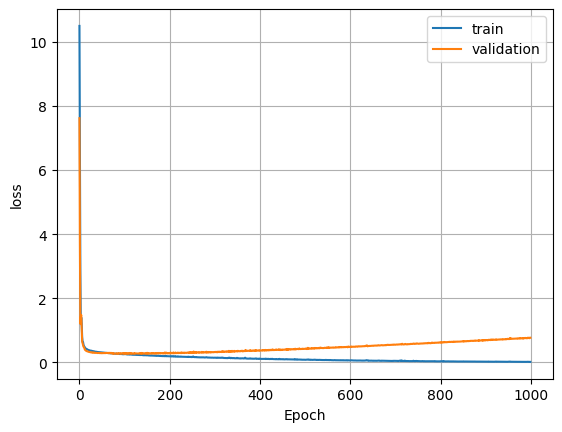

In [44]:
plot_loss(history)

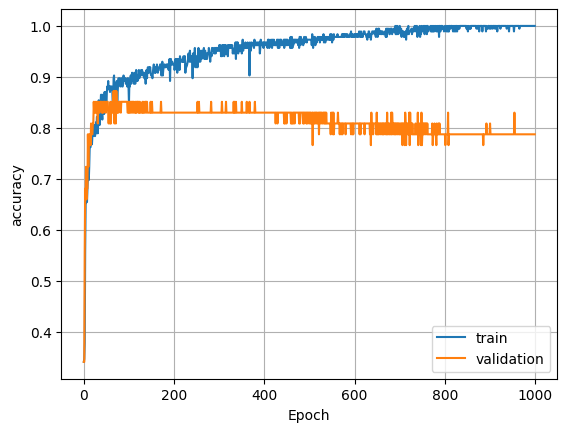

In [45]:
plot_loss(history, 'accuracy')

So probably shouldn't go for 1000 epochs, there's overfitting there

I'm going to implement Early Stopping. It's a form of regularisation - to try to prevent overfitting, and it also will train our model more quickly.

<a href="https://en.wikipedia.org/wiki/Early_stopping">Wikipedia Link</a>

<a href="https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/">More Early Stopping Detail</a>

<a href="https://towardsdatascience.com/early-stopping-a-cool-strategy-to-regularize-neural-networks-bfdeca6d722e">Another Link</a>

I mentioned it in lectures without going into any detail and will talk about it more next week.

The basic idea is, monitor how well the validation set is performing after every epoch, if there has not been any improvement in its score for a while (say in 10 epochs or whatever you pick as your "patience" - we don't just say over 1 epoch as training could just be "stuck"). MLPClassifier in sklearn has it sort of implemented and we saw it  above "Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping."

It is added as a callback function that checks for what we want

In [46]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Be careful with restore_best_weights see https://medium.com/@doleron/never-use-restore-best-weights-true-with-earlystopping-754ba5f9b0c6

In [ ]:
#callback_modelcheckpoint_loss = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_loss.keras', monitor='val_loss', save_best_only=True)

In [47]:
model_tf2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

In [48]:
model_tf2.compile(
     optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [49]:
model_tf2.fit(X_train.values, y_train_enc, epochs=1000, validation_split=0.2, callbacks=[callback])

Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5807 - loss: 11.1623 - val_accuracy: 0.5106 - val_loss: 3.9312
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6480 - loss: 2.6728 - val_accuracy: 0.8511 - val_loss: 0.9598
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7681 - loss: 1.2616 - val_accuracy: 0.8723 - val_loss: 0.5424
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7832 - loss: 0.8196 - val_accuracy: 0.8723 - val_loss: 0.5303
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8104 - loss: 0.6826 - val_accuracy: 0.8723 - val_loss: 0.4884
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8303 - loss: 0.5636 - val_accuracy: 0.8511 - val_loss: 0.4848
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8474 - loss: 0.5829 - val_accuracy: 0.8936 - val_loss: 0.4646
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8315 - loss: 0.6091 - val_accuracy: 0.8298 - 

I said go for 1000 epochs, but will only go for a certain amount due to early stopping

I also said to restore_best_weights, so it should be the model with the lowest val_loss that was found

In [50]:
model_tf2.evaluate(X_test, y_test_enc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7934 - loss: 0.3874 


[0.4293298125267029, 0.7820512652397156]

This may be worse than sklearn still

Anything you run may be different due to randomisation of batches etc

You can try adding regularisation. Using a different loss/optimizer and other things to improve your model. Also there is going to be some random chance.